In [5]:
from sympy import *
from dtumathtools import *
init_printing()

x, k_s, delta, phi, w, t, A = symbols('x k_s delta phi w t A', real=True)

# 1.2

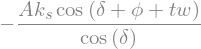

In [17]:
k = k_s*(E**(I*delta)/cos(delta))
z = A*E**(I*(w*t+phi))
x = re(z)
F_FHM = re((-k*z).simplify())
F_FHM

In [18]:
def F_func(ks, d):
    return F_FHM.subs({A: 1, phi:0, w:1, k_s:ks, delta: d})

# 1.3

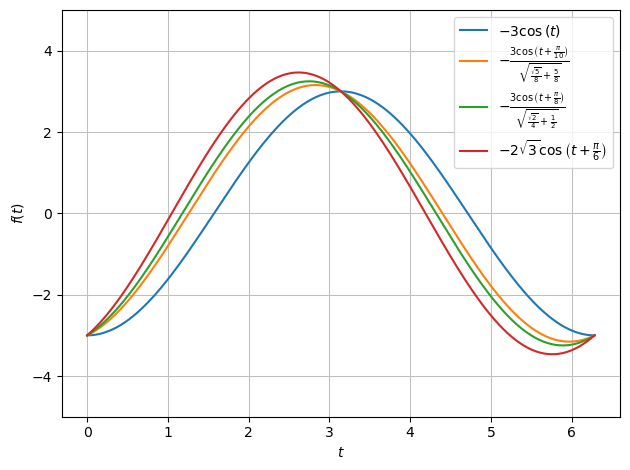

In [19]:
p1 = dtuplot.plot(F_func(3, 0), (t,0,2*pi), ylim = (-5,5), show=False)
p2 = dtuplot.plot(F_func(3, pi/10), (t,0,2*pi), ylim = (-5,5), show=False)
p3 = dtuplot.plot(F_func(3, pi/8), (t,0,2*pi), ylim = (-5,5), show=False)
p4 = dtuplot.plot(F_func(3, pi/6), (t,0,2*pi), ylim = (-5,5), show=False)
comb = p1+p2+p3+p4
comb.show()

In [20]:
fx = x.subs({A:1, phi:0, w:1})
fx

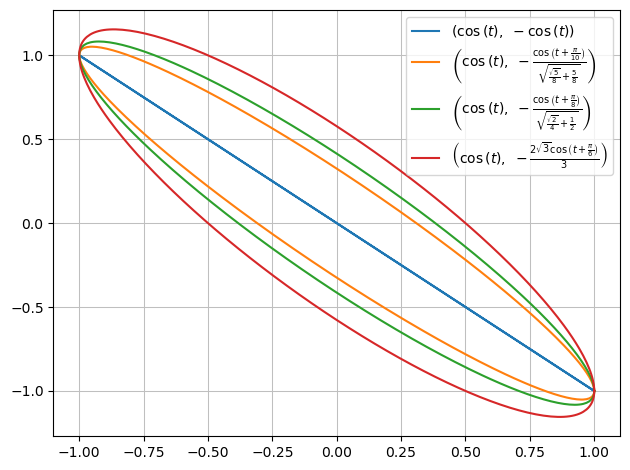

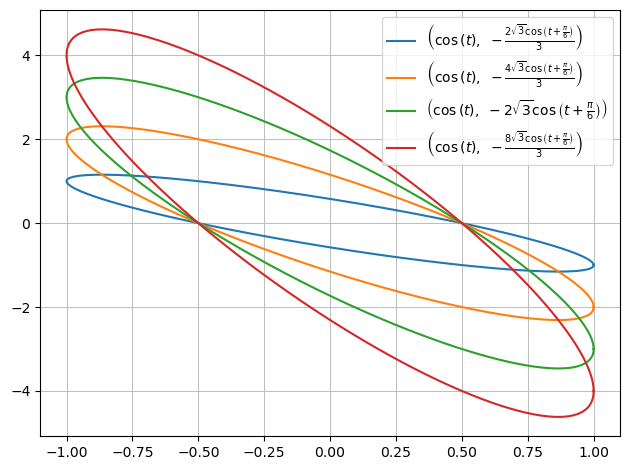

In [21]:
def plotkks(ks, d):
    comb = sum([dtuplot.plot_parametric(
        *Matrix([fx,F_func(ks, delta)]),
        (t,0,2*pi), use_cm=False, show=False) for delta in d])
    comb.show()

def plotkd(ks, d):
    comb = sum([dtuplot.plot_parametric(
        *Matrix([fx,F_func(ks_, d)]), 
        (t,0,2*pi), use_cm=False, show=False) for ks_ in ks])
    comb.show()

plotkks(1, [0, pi/10, pi/8, pi/6])
plotkd([1, 2, 3, 4], pi/6)

# 1.4

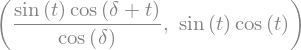

In [22]:
xd = diff(x,t)
inte = (F_FHM*xd).subs({A:1, phi:0, w:1, k_s: 1})
inte, inte.subs({delta:0})

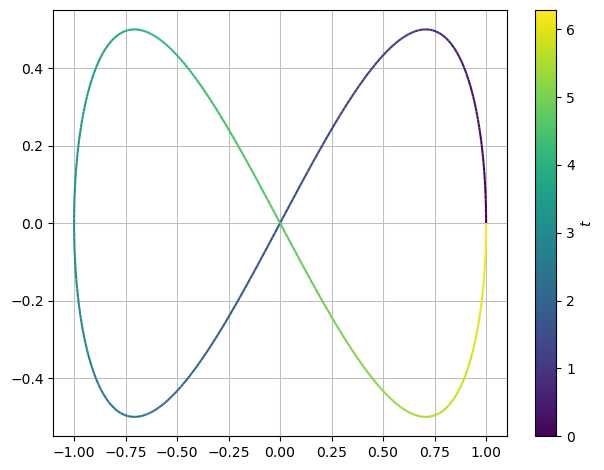

In [23]:
dtuplot.plot_parametric(*Matrix([fx,inte.subs({delta:0})]), (t,0,2*pi))

In [24]:
t1 = (t, 0, 2*pi)

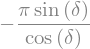

In [25]:
E1 = integrate(inte, t1)
E1

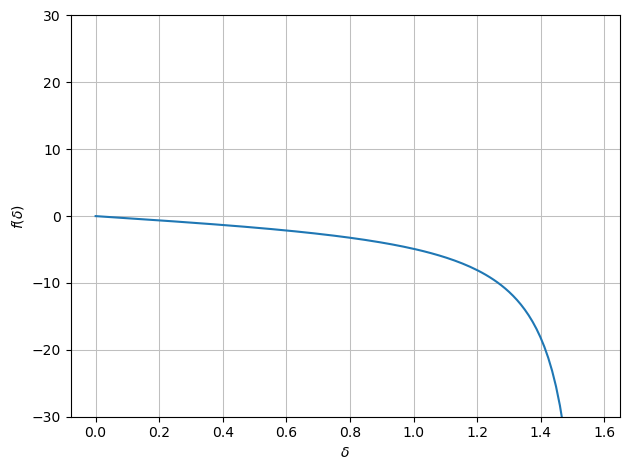

In [26]:
dtuplot.plot(E1, (delta, 0, pi/2), ylim = (-30,30))

# Andre måder at få FFHM på med andre simplify metoder

In [ ]:
k = k_s*(1 + tan(delta)*I)
z = A*(cos(w*t+phi)+I*sin(w*t+phi))
aws = re((-k*z).simplify())
aws

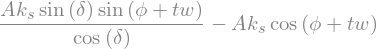

In [ ]:
from sympy.simplify.fu import TR2
TR2(aws)

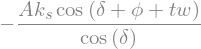

In [ ]:
k = k_s*(1 + sin(delta)/cos(delta)*I)
z = A*(cos(w*t+phi)+I*sin(w*t+phi))
aws = re((-k*z).simplify())
aws

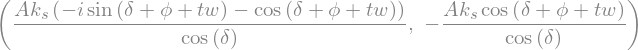

In [ ]:
TR8(-k*z), re(TR8(-k*z))